In [1]:
%matplotlib inline
import numpy as np
from astropy.table import Table, join, hstack
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import Euclid

%erun Phosphoros 0.18

from PhzCLI.PlotSpecZComparison import compute_stats, SpeczPhotozPlot, displayHistogram

plt.rcParams['figure.figsize'] = (20, 10)

NNPZ run using the SC8 reference sample over *only* galaxies from tile 78831. SNR ratio of 10 applied to the input.

In [2]:
mer = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod/mer_gal.fits')

Run with 300 neighbors, we mask flagged objects

In [3]:
phz300 = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod/run300.fits', hdu=1)
phz30 = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod/run30.fits', hdu=1)
phzrand = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod/run_random.fits', hdu=1)

phz300 = phz300[(phz300['FLAGS_1'] == 0) & np.isfinite(phz300['REDSHIFT_MEDIAN'])]
phz30 = phz30[(phz30['FLAGS_1'] == 0) & np.isfinite(phz30['REDSHIFT_MEDIAN'])]
phzrand = phzrand[(phzrand['FLAGS_1'] == 0) & np.isfinite(phzrand['REDSHIFT_MEDIAN'])]

phz300 = join(phz300, mer, 'OBJECT_ID')
phz30 = join(phz30, mer, 'OBJECT_ID')
phzrand = join(phzrand, mer, 'OBJECT_ID')

# Compare results

## Statistics for 300 neighbors

In [4]:
stats300 = compute_stats(phz300['REDSHIFT_MEDIAN'], phz300['Z_OBS'])

--> Mean                :  0.02860540732359275
--> Median              :  0.008465155959129333
--> Sigma               :  0.14927431655343426
--> Mad                 :  0.037398748099803925
--> Outliers            :  10.2991452991453 %
--> Sigma (no outliers) :  0.03493757


/opt/miniconda3/envs/phz/lib/python3.7/site-packages/numpy/core/fromnumeric.py:753: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


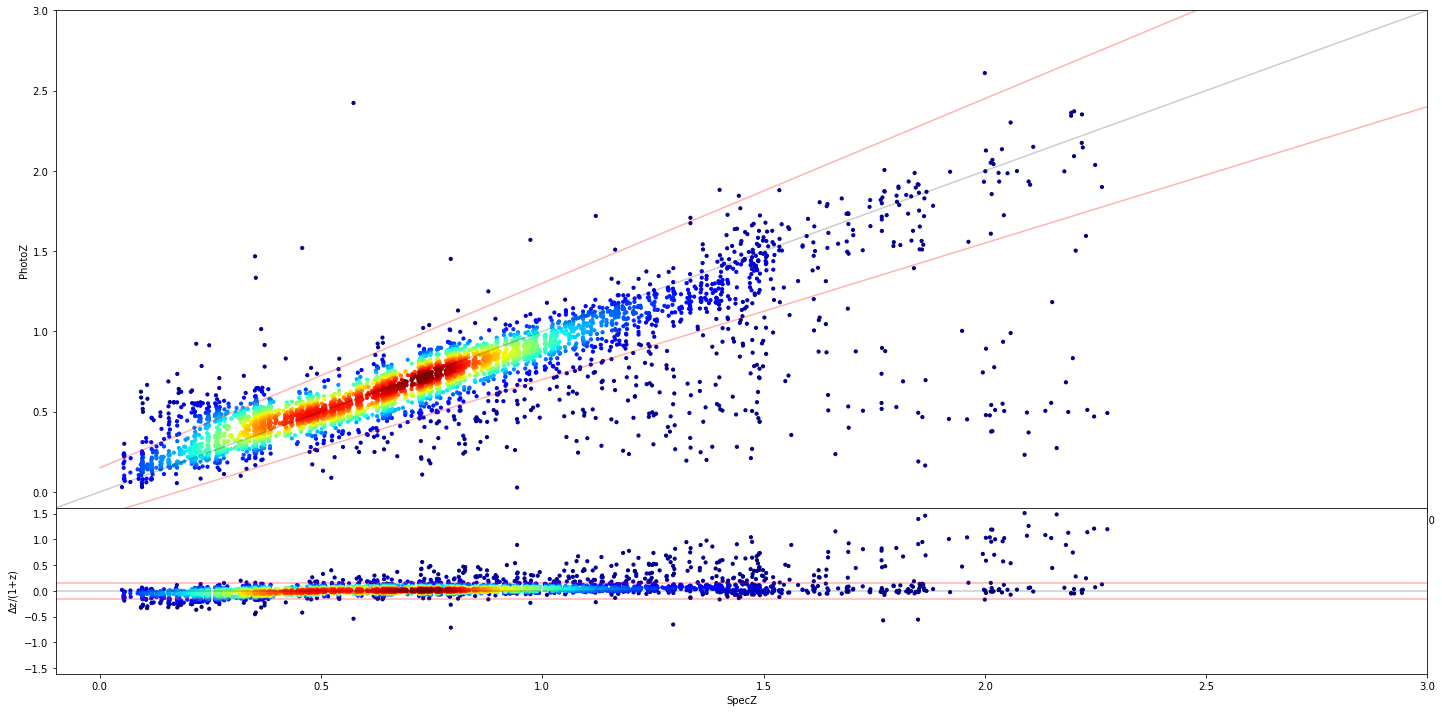

In [5]:
SpeczPhotozPlot(phz300['OBJECT_ID'], specz=phz300['Z_OBS'], photz=phz300['REDSHIFT_MEDIAN'], data=stats300[0], zmax=3)

## Statistics for 30 neighbors

In [6]:
stats30 = compute_stats(phz30['REDSHIFT_MEDIAN'], phz30['Z_OBS'])

--> Mean                :  0.029700621449812326
--> Median              :  0.008898545056581497
--> Sigma               :  0.15172648993334759
--> Mad                 :  0.036764368414878845
--> Outliers            :  10.408206881812353 %
--> Sigma (no outliers) :  0.03486516


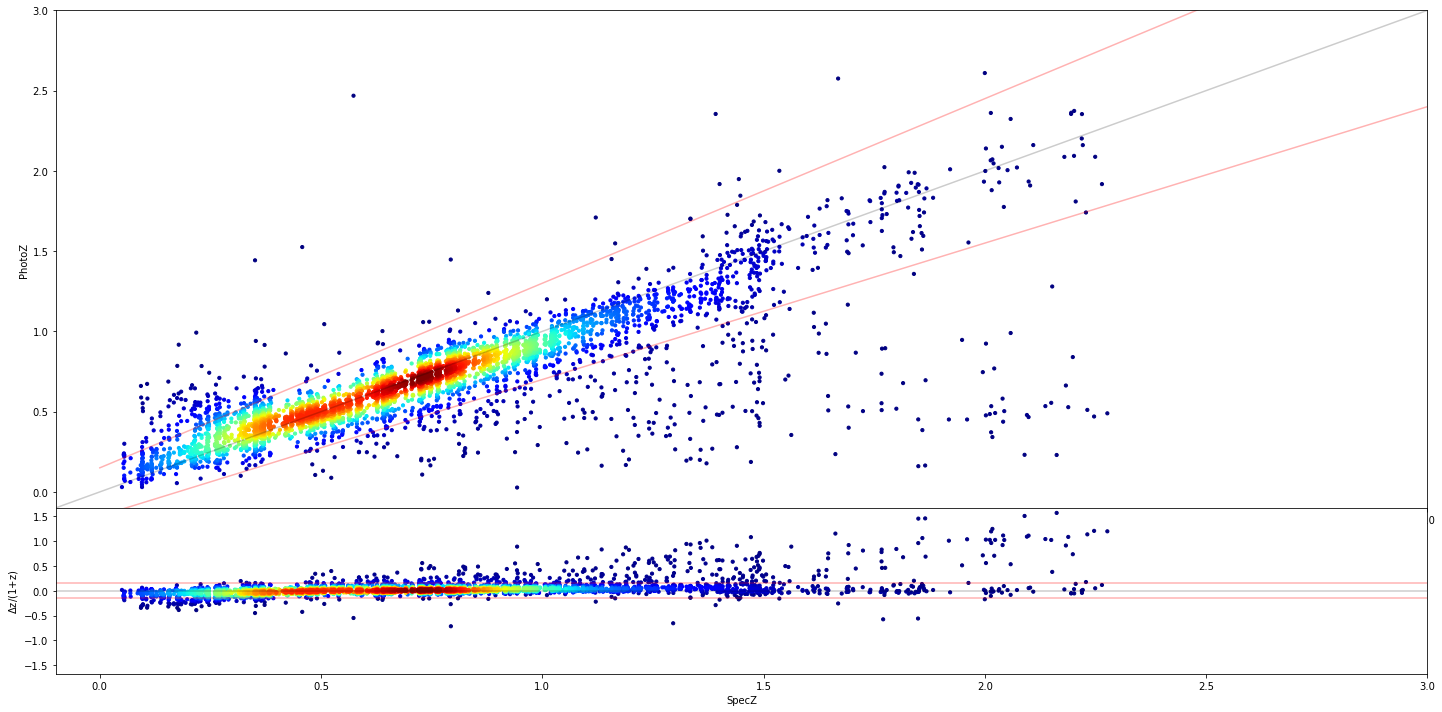

In [7]:
SpeczPhotozPlot(phz30['OBJECT_ID'], specz=phz30['Z_OBS'], photz=phz30['REDSHIFT_MEDIAN'], data=stats30[0], zmax=3)

## Statistics for 30 sampled

In [8]:
statsrand = compute_stats(phzrand['REDSHIFT_MEDIAN'], phzrand['Z_OBS'])

--> Mean                :  0.0396571646562614
--> Median              :  0.005747064016759396
--> Sigma               :  0.2462301884777511
--> Mad                 :  0.11939696967601776
--> Outliers            :  41.48556600713591 %
--> Sigma (no outliers) :  0.04230726


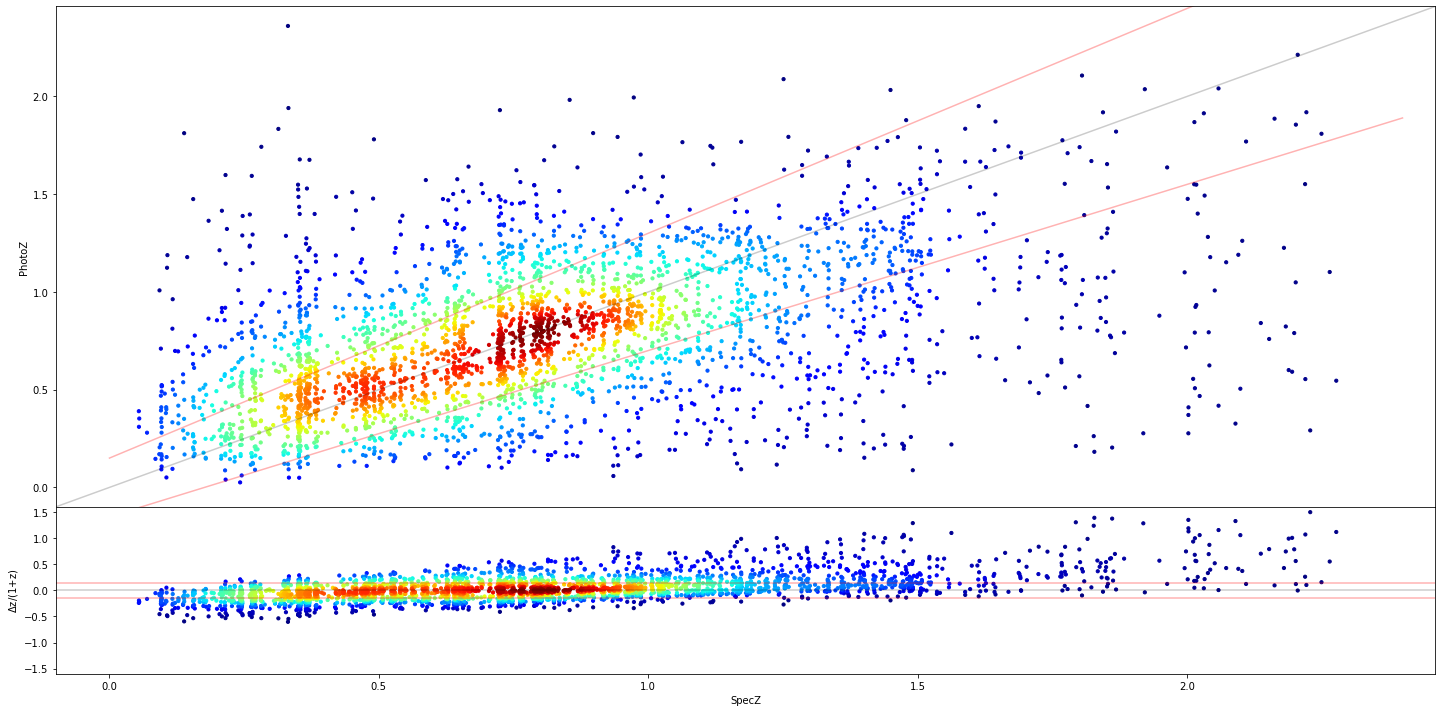

In [9]:
SpeczPhotozPlot(phzrand['OBJECT_ID'], specz=phzrand['Z_OBS'], photz=phzrand['REDSHIFT_MEDIAN'], data=statsrand[0])